# Visualización de datos con Seaborn
Seaborn es una libreria de visualizacíon en Python que trabaja sobre Matplotlib. Esta libreria nos permite generar gráficos a partir de DataFrames de Pandas de manera muy cómoda y accesible. 

Antes de empezar a trabajar vamos a importar las librerias que ya conocemos de antes, y ahora sumaremos Seaborn, la cual se suele importar con el nombre `sns`. Además, se suele acompañar de la instrucción `sns.set()` que sirve para darle un estilo particular a los gráficos, como veremos en breve.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set() 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Seaborn ya viene con algunos datasets incorporados. Puedes ver cuáles con la siguiente instrucción:

In [2]:
sns.get_dataset_names()

/usr/local/lib/python3.6/dist-packages/seaborn/utils.py:384: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file /usr/local/lib/python3.6/dist-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

Vamos a usar el dataset Iris, que ya conocemos. Para cargarlo, simplemente hacemos:

In [3]:
data = sns.load_dataset('iris')
#data = sns.load_dataset('penguins')


data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Notar que ya lo carga en un Data Frame de Pandas. Las columnas tienen nombres ligeramente distintos a los que veníamos usando, pero la información es la misma. Veamos qué podemos hacer con Seaborn para visualizar de forma eficiente este dataset.

## 1. Diagramas de dispersión e histogramas con Seaborn.

Una instrucción muy cómoda para hacer una primera inspección de un dataset es `sns.pairplot()`. Hay que tener cuidado con esta función cuando el dataset tiene muchas instancias o columnas.

sns.pairplot(data,hue=None,hue_order=None,palette=None,vars=None,x_vars=None,y_vars=None,kind='scatter',diag_kind='auto', markers=None,height=2.5,aspect=1,corner=False,dropna=True,plot_kws=None, diag_kws=None,grid_kws=None,size=None,)

Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric variable in ``data`` will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated
differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

It is also possible to show a subset of variables or plot different variables on the rows and columns.

Parameters
----------
data : DataFrame
    Tidy (long-form) dataframe where each column is a variable and
    each row is an observation.
hue : string (variable name), optional
    Variable in ``data`` to map plot aspects to different colors.
hue_order : list of strings
    Order for the levels of the hue variable in the palette
palette : dict or seaborn color palette
    Set of colors for mapping the ``hue`` variable. If a dict, keys
    should be values  in the ``hue`` variable.
vars : list of variable names, optional
    Variables within ``data`` to use, otherwise use every column with
    a numeric datatype.
{x, y}_vars : lists of variable names, optional
    Variables within ``data`` to use separately for the rows and
    columns of the figure; i.e. to make a non-square plot.
kind : {'scatter', 'reg'}, optional
    Kind of plot for the non-identity relationships.
diag_kind : {'auto', 'hist', 'kde', None}, optional
    Kind of plot for the diagonal subplots. The default depends on whether
    ``"hue"`` is used or not.
markers : single matplotlib marker code or list, optional
    Either the marker to use for all datapoints or a list of markers with
    a length the same as the number of levels in the hue variable so that
    differently colored points will also have different scatterplot
    markers.
height : scalar, optional
    Height (in inches) of each facet.
aspect : scalar, optional
    Aspect * height gives the width (in inches) of each facet.
corner : bool, optional
    If True, don't add axes to the upper (off-diagonal) triangle of the
    grid, making this a "corner" plot.
dropna : boolean, optional
    Drop missing values from the data before plotting.
{plot, diag, grid}_kws : dicts, optional
    Dictionaries of keyword arguments. ``plot_kws`` are passed to the
    bivariate plotting function, ``diag_kws`` are passed to the univariate
    plotting function, and ``grid_kws`` are passed to the :class:`PairGrid`
    constructor.

Returns
-------
grid : :class:`PairGrid`
    Returns the underlying :class:`PairGrid` instance for further tweaking.


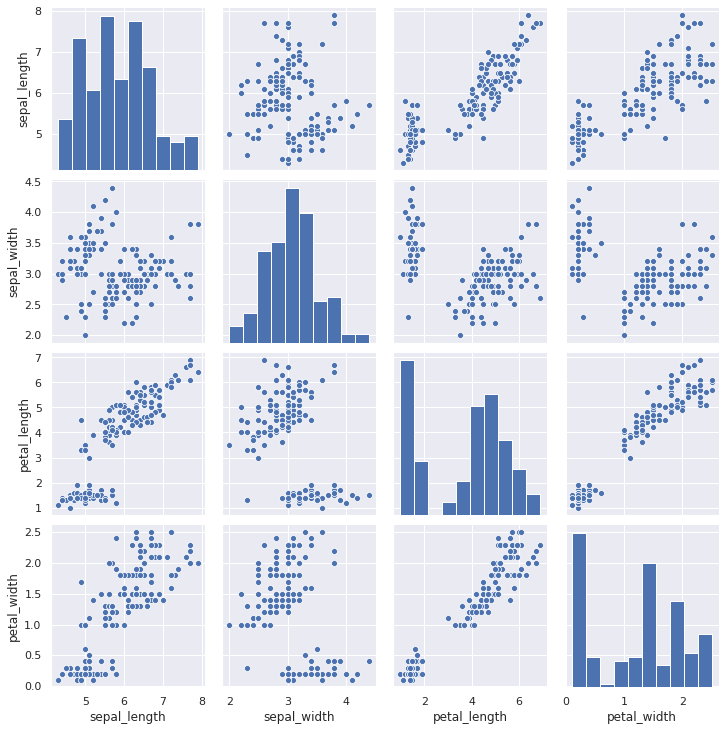

In [4]:
sns.pairplot(data)


¿Ves lo que hizo?¿Cómo describirías este gráfico? Recuerda siempre consultar la documentación.

Este grafico se puede mejorar, pasándole el argumento `hue` a la función:

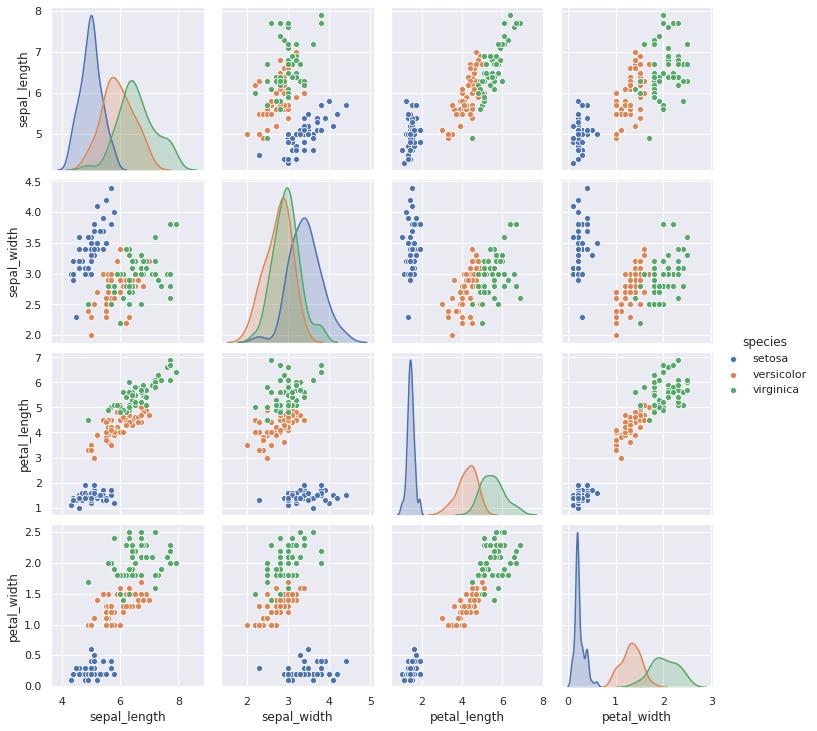

In [5]:
sns.pairplot(data, hue = 'species')  #ordena los datos por 

Éste debe ser unos de los gráficos más famosos en ciencia de datos. ¿Te parece útil?¿Por qué?
    
    Permite analizar la cada columna entre si para ver relaciones entre ellas o formas de la distribucion a simple vista

Vuelve a correr las instrucciones, pero descomentando la instrucción `sns.set()` al comienzo del código. ¿Qué cambió?
        
        Permite setear en una linea todo los formatos de los datos que se van a realizar.
        https://seaborn.pydata.org/generated/seaborn.set.html


A continuación, veamos cómo generar cada componente de este gráfico de forma independiente.

### 1.1 Scatterplot

Hacer un diagrama de dispersión con Seaborn es sencillo:

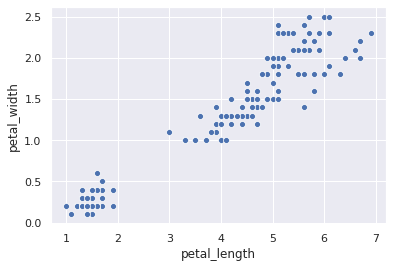

In [6]:
sns.scatterplot(x="petal_length", y="petal_width", data=data)
#sns.scatterplot(x="flipper_length_mm", y="body_mass_g", data=data)

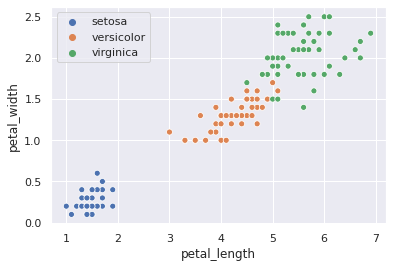

In [7]:
sns.scatterplot(x="petal_length", y="petal_width",hue=data.species.tolist(),data=data)
#sns.scatterplot(x="flipper_length_mm", y="body_mass_g",hue=data.species.tolist(), data=data)
#si uno pone  hue="species" , data=data) tira un error donde no reconoce el hue porque encuentra algo vacio.
#hay que darle una lista del data.categoria.tolist() https://stackoverflow.com/questions/63443583/seaborn-valueerror-zero-size-array-to-reduction-operation-minimum-which-has-no
#por lo visto es porque se modifico la version 

Y, si le pasamos la especie en el argumento `hue`, el gráfico mejora sustancialmente: permite separar por otros atributos

**Ejercicio:** intenta hacer este mismo gráfico con Matplotlib.

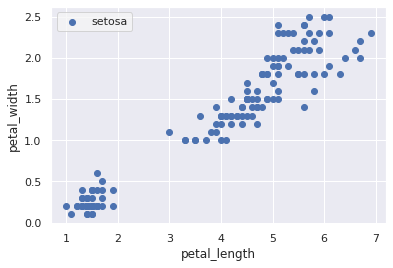

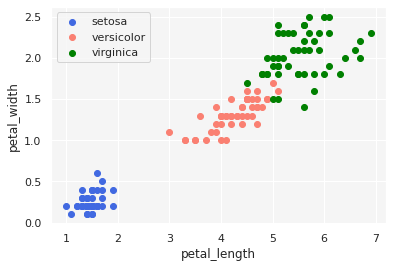

In [8]:
#sin separar por especies
import matplotlib.pyplot as plt
Data= sns.load_dataset('iris')

plt.figure()
plt.scatter(Data['petal_length'], Data['petal_width'])
#, hue="species" , data=data)
plt.rcParams['axes.facecolor'] = 'whitesmoke' #https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend(['setosa','versicolor','virginica'])
plt.grid(color='white')

plt.figure()#separando por especies tengo que definir tres veces mis elementos
#setosa
Data_S=Data[Data['species']=='setosa']
plt.scatter(Data_S['petal_length'], Data_S['petal_width'],color='royalblue')
#versicolor
Data_Vc=Data[Data['species']=='versicolor']
plt.scatter(Data_Vc['petal_length'], Data_Vc['petal_width'],color='salmon')
#virginica
Data_Vg=Data[Data['species']=='virginica']
plt.scatter(Data_Vg['petal_length'], Data_Vg['petal_width'],color='green')

plt.rcParams['axes.facecolor'] = 'whitesmoke' #https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend(['setosa','versicolor','virginica'])
plt.grid(color='white')
#https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html

### 1.2 Histogramas

Los histogramas en Seaborn son un poco más versátiles que los de Matplotlib. Veamos cómo:

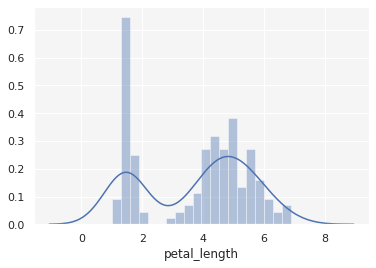

In [9]:
data= sns.load_dataset('iris')

sns.distplot(data['petal_length'], bins = 20)
#sns.distplot(data['body_mass_g'], bins = 20) #es una distribucion asimetrica, no normal, 


**Ejercicio:** Modificar los siguientes argumentos de la función `distplot` y observar qué hacen: `hist`,`kde` (prestar atención a la escala en el eje *y*) y `rug`.

histbool, optional

    Whether to plot a (normed) histogram.
kdebool, optional

    Whether to plot a gaussian kernel density estimate.
rugbool, optional

    Whether to draw a rugplot on the support axis.



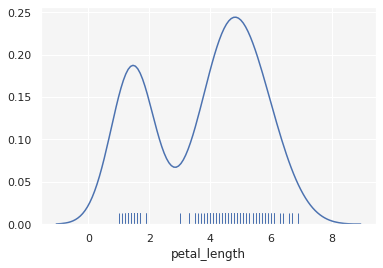

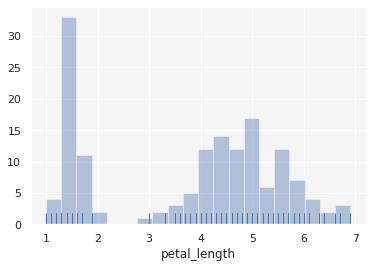

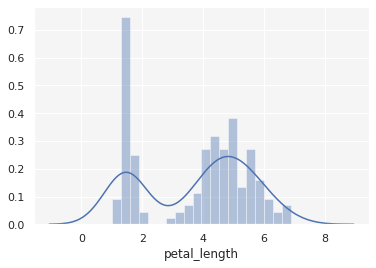

In [10]:
#Plot the distribution with a kernel density estimate and rug plot
#el hist agrega el histograma de la distribucion a la cual ajustan la fdp
plt.figure()
sns.distplot(data['petal_length'], bins = 20, hist=False,rug=True,kde=True) 

#Plot the distribution with a histogram and maximum likelihood gaussian distribution fit
#Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable. It is used for non-parametric analysis.
plt.figure()
sns.distplot(data['petal_length'], bins = 20, kde=False,rug=True,hist=True)

#rug plot which draws a small vertical tick at each observation
plt.figure()
sns.distplot(data['petal_length'], bins = 20, rug=False,kde=True,hist=True)

#https://pythonbasics.org/seaborn-distplot/
#https://seaborn.pydata.org/tutorial/distributions.html

Otra tipo de visualización que combina ambas opciones es `jointplot`:

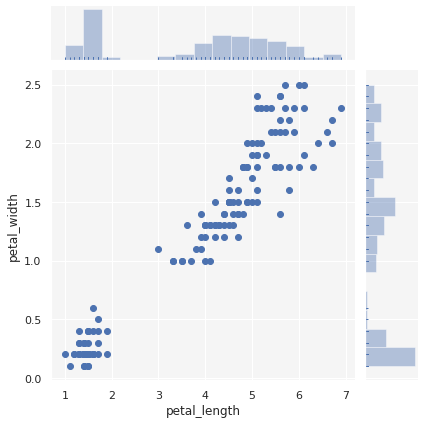

In [11]:
#muestra la dispersion entre dos variables. e histogramas de ambas variables .
#son utiles para mostrar en papers para resumir datos(no recomendable para mostrarlos en datos menos tecnicos)
sns.jointplot(x="petal_length", y="petal_width", marginal_kws=dict(bins=15, rug=True), data=data)

Esperamos con estos primeros ejemplos haberlos convencido que el uso de Seaborn facilita la visualización de datos provienentes de un DataFrame respecto a la utilización de (solo) Matplotlib. A continuación vamos a explorar otras funciones de visualización que nos ofrece esta libreria.

## 2. Categorical Plots

Como su nombre lo indica, los categorical plots son gráficos donde una de las variables a graficar es de tipo categórica. Este tipo de gráficos son muy usados en Data Science y Seaborn tiene algunas funciones especiales dedicada a ellos.

Una función útil para contar las diferentes etiquetas de una variable categórica es `countplot`:

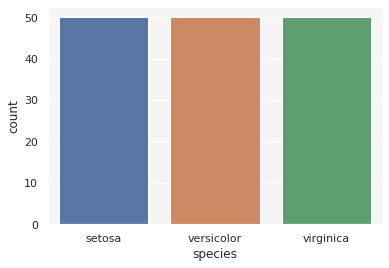

In [12]:
sns.countplot(data = data, x = "species")

Así, obtenemos tres barras de altura 50, una por especie, representando la cantidad de instancias que hay en el dataset de cada una.

Muchas veces queremos graficar una variable numérica en función de una variable categórica. Por ejemplo, el ancho del pétalo según la especie. Veamos cómo realizar un grafico de este tipo en Matplotlib:

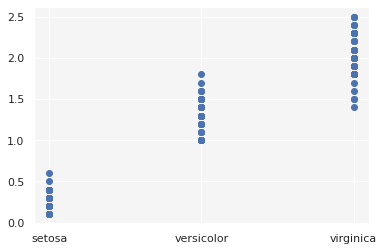

In [13]:
especie = data['species']
ancho_petalo = data['petal_width']
plt.scatter(especie,ancho_petalo)

Como podemos observar el resultado no es muy satisfactorio. Al estar todos los puntos sobre una misma linea, no se pueden distinguir entre sí. 

Veamos ahora cómo realizar el mismo gráfico son Seaborn, usando la función `catplot`:

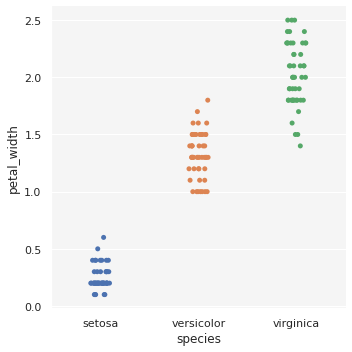

In [14]:
sns.catplot(data = data, x = "species", y = "petal_width")

Como se puede observar, Seaborn le da automáticamente distintos colores a las categorías y además los separa para poder identificar la cantidad de puntos en cada grupo con facilidad.

**Ejercicio - Challenge**:

1. Realizar con Seaborn un gráfico del largo del pétalo según la especie.
1. Realizar el mismo gráfico, pero ahora como gráfico de barras. **Pista**: ver el parametro `kind` de la función `catplot` o la función `barplot`.
1. ¿Que representan las barritas negras?

        Size of confidence intervals to draw around estimated values.  
        If "sd", skip bootstrapping and draw the standard deviation of the observations.
        If ``None``, no bootstrapping will be performed, and error bars will not be drawn.
        
1. Averiguar la utilidad de los parámetros `ci` y `estimator`.

        estimator : callable that maps vector -> scalar, optional
        Statistical function to estimate within each categorical bin.
        UTILIZA UNA FUNCION PARA ESTIMAR ALGO (MEDIA, MEDIANA....) EN CADA BIN

        ci : float or "sd" or None, optional
        Size of confidence intervals to draw around estimated values.  If
        "sd", skip bootstrapping and draw the standard deviation of the
        observations. If ``None``, no bootstrapping will be performed, and
        error bars will not be drawn.
        DEFINE LAS BARRAS DE ERROR o el DESVIO ESTANDAR O LA CANTIDAD DE SIGMAS
        https://seaborn.pydata.org/generated/seaborn.barplot.html
        
        
        El CI seria las barras de error de la funcion estimator(por default es la media).

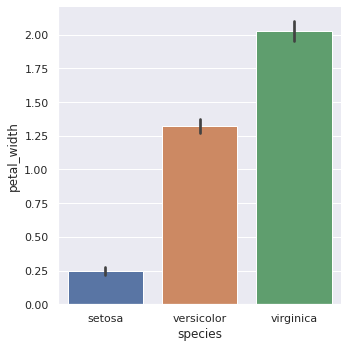

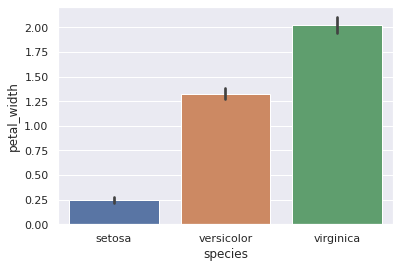

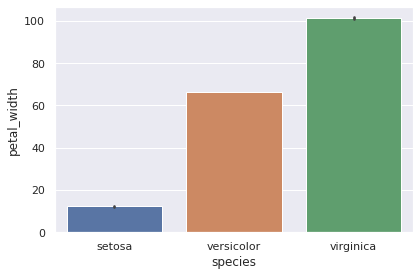

In [15]:
#https://www.tutorialspoint.com/seaborn/seaborn_statistical_estimation.htm
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set() 

Data= sns.load_dataset('iris')

#plt.subplot(1,3,1)
sns.catplot(data = Data, x = "species", y = "petal_width", kind='bar')
#kind : string, optional
#    The kind of plot to draw (corresponds to the name of a categorical
#    plotting function. Options are: "point", "bar", "strip", "swarm",
#    "box", "violin", or "boxen".



plt.figure()
sns.barplot(x = "species", y = "petal_width",data=Data)
#https://seaborn.pydata.org/generated/seaborn.barplot.html
#https://seaborn.pydata.org/tutorial/categorical.html

plt.figure()
sns.barplot(x = "species", y = "petal_width",data=Data, estimator=sum, ci='sd') 
#https://www.sharpsightlabs.com/blog/seaborn-barplot/


plt.tight_layout()
plt.show()

### 3. Diagrama de Cajas

Generar diagramas de cajas es muy sencillo. Podemos generar el diagrama de una columna de la siguiente manera:

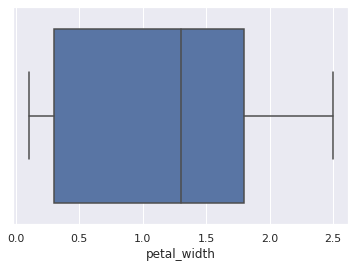

In [16]:
#sns.boxplot(data = data, y = "petal_width")
sns.boxplot(data = Data, x = "petal_width")

Pero aporta mucha más información si separamos por especie.

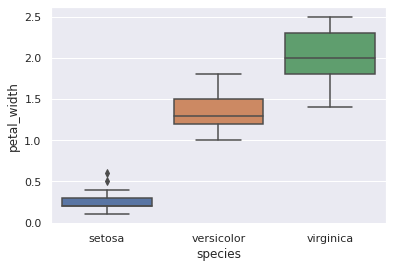

In [17]:
sns.boxplot(data = Data, x = 'species', y = "petal_width")

## 4. Heatmaps y correlación
        
        https://likegeeks.com/es/mapa-de-calor-de-seaborn/
    ¿Qué es un heatmap?
    Un mapa de calor es una técnica de visualización de datos que muestra
     la magnitud de un fenómeno como color en dos dimensiones.
      La variación en el color puede ser
      por matiz o intensidad, dando señales visuales obvias al 
      lector sobre cómo el fenómeno se agrupa o varía en el espacio

    ¿Cómo se hacen en Seaborn?
    sns.heatmap()
    
    ¿Qué hacía la función `corr()` de Pandas?
    mide el grado de correlacion entre dos conjuntos de datos
    https://www.w3resource.com/pandas/dataframe/dataframe-corr.php
    
    ¿Cuáles son sus parámetros?
    dato
    method='pearson'
    min_periods=1 (Minimum number of observations required per pair of columns to have a valid result. Currently only available for Pearson and Spearman correlation.)
    
    ¿Qué hace el parámetro `method`? 
    Es el metodo con el que se hace la correlacion:
        pearson : standard correlation coefficient. 
        kendall : Kendall Tau correlation coefficient. 
        spearman:Spearman rank correlation
    
    Interpretar el gráfico obtenido.

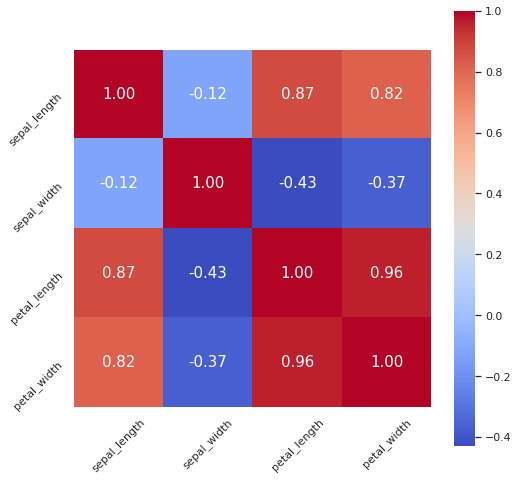

In [18]:
corr = Data.drop(columns = 'species').corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= Data.drop(columns = 'species').columns, 
           yticklabels= Data.drop(columns = 'species').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

#el grafico muestra la correlacion entre los elementos del dataset y el grado de correlacion lo indica el grado de color

## 5. Combinando con Matplotlib

Como Seaborn corre sobre Matplotlib, se pueden combinar instrucciones de ambas librerías sin problemas. Veamos un ejemplo:

Text(0, 0.5, 'Ancho del pétalo (cm)')

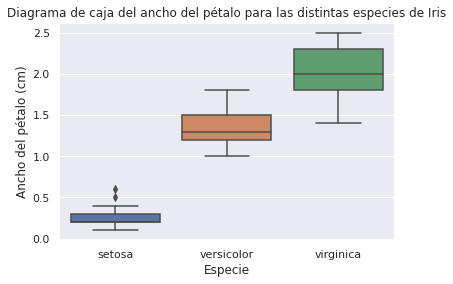

In [19]:
sns.boxplot(data = Data, x = 'species', y = "petal_width")
plt.title('Diagrama de caja del ancho del pétalo para las distintas especies de Iris')

# Con estas instrucciones reemplazamos las etiquetas en los ejes que pone Seaborn
plt.xlabel('Especie')
plt.ylabel('Ancho del pétalo (cm)')

## Ejercitación

Elige uno de los datasets disponibles en Seaborn o el dataset de críticas de vinos del encuentro anterior. Aplica las herramientas vistas de Pandas y de Seaborn para obtener una primera aproximación a las características del conjunto de datos elegido.

In [20]:
#para instalar cosas desde python.
#pip install pandas==0.25
#from pandas_profiling import ProfileReport
#profile=ProfileReport(data) me da un perfilamiento de los datos

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataT = sns.load_dataset('titanic')
dataT.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Figure size 432x288 with 0 Axes>

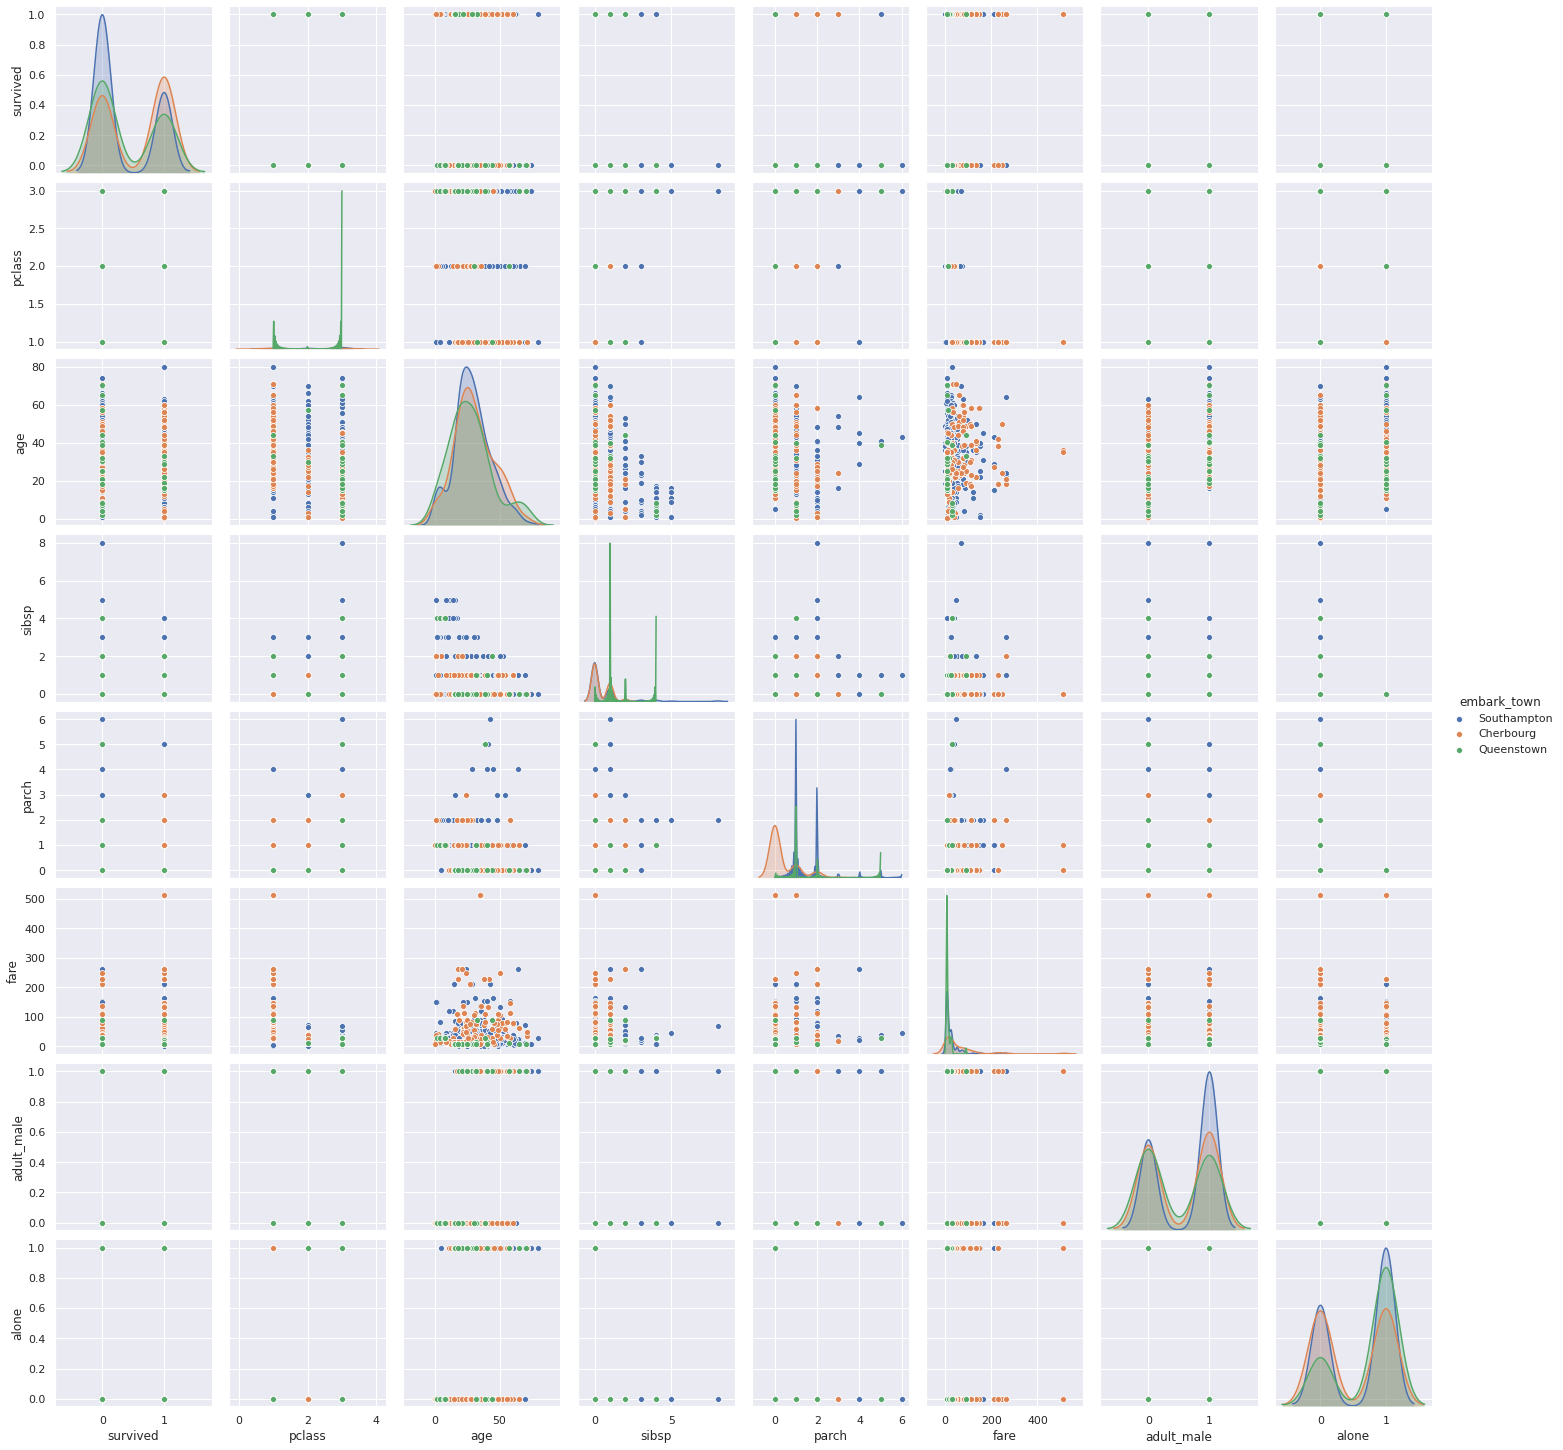

In [21]:
plt.figure()
sns.pairplot(dataT, hue = 'embark_town')
plt.show()


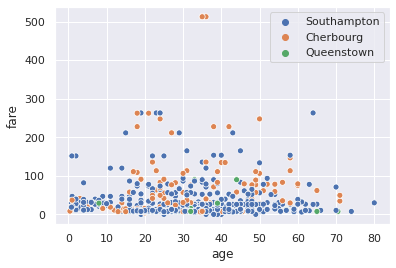

In [22]:
plt.figure()
sns.scatterplot(x="age", y="fare",hue=dataT.embark_town.tolist(),data=dataT)
#sns.scatterplot(x="age", y="fare",hue=list(dataT["embark_town"]),data=dataT)


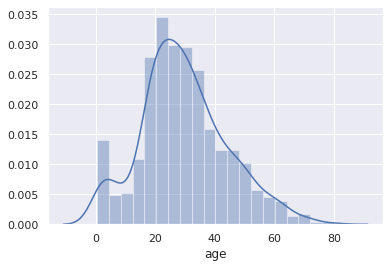

In [23]:
plt.figure()
sns.distplot(dataT['age'], bins = 20)



<Figure size 432x288 with 0 Axes>

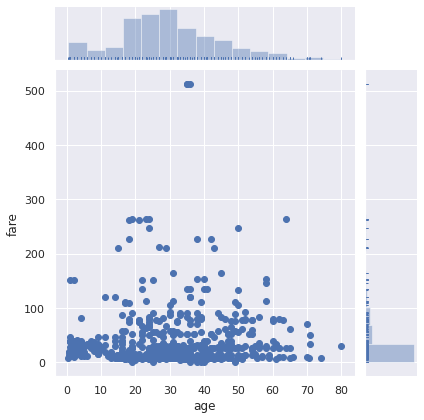

In [24]:
plt.figure()
sns.jointplot(x="age", y="fare", marginal_kws=dict(bins=15, rug=True), data=dataT)


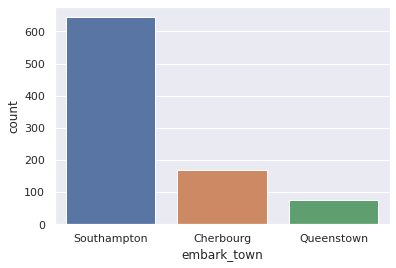

In [25]:
plt.figure()
sns.countplot(data = dataT, x = "embark_town")


<Figure size 432x288 with 0 Axes>

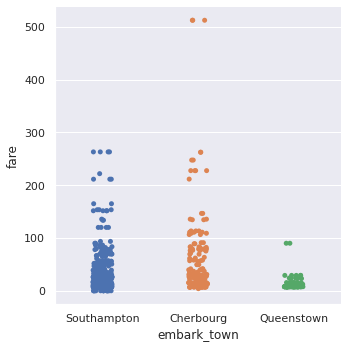

In [26]:
plt.figure()
sns.catplot(data = dataT, x = "embark_town", y = "fare")


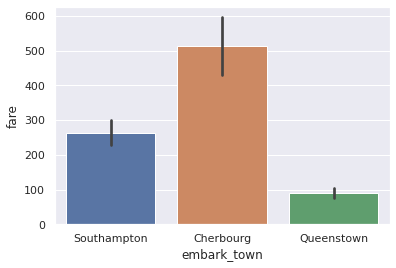

In [27]:
plt.figure()
sns.barplot(x = "embark_town", y = "fare",data=dataT,estimator=max, ci='sd')
